## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df["Mouse ID"].value_counts()

g989    13
a275    10
y260    10
b128    10
s710    10
        ..
u153     1
h428     1
x336     1
f932     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index("Mouse ID")

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(["g989"])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
tumour = clean_df.groupby(["Drug Regimen"])
tumour_mean = tumour["Tumour Volume (mm3)"].mean()
tumour_med = tumour["Tumour Volume (mm3)"].median()
tumour_var = tumour["Tumour Volume (mm3)"].var()
tumour_std = tumour["Tumour Volume (mm3)"].std()
tumour_sem = tumour["Tumour Volume (mm3)"].sem()

tumour_df = pd.DataFrame({
                        "Mean": tumour_mean,
                        "Median" : tumour_med,
                        "Variance" : tumour_var,
                        "Standard Deviation" : tumour_std,
                        "SEM" : tumour_sem
                        })
tumour_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumour2 = clean_df.groupby(["Drug Regimen"])["Tumour Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumour2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

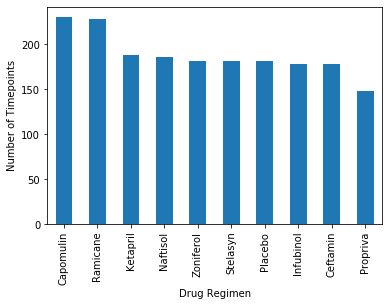

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
plt.ylabel("Number of Timepoints", size=10)
timepoint.sort_values(ascending=False).plot.bar(width=0.5)  
plt.show()

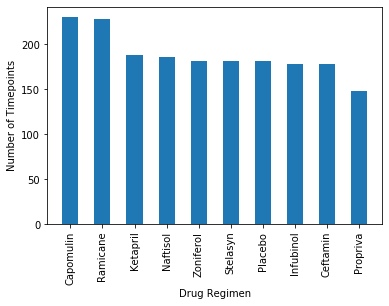

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint2 = timepoint.sort_values(ascending=False)
plt.bar(timepoint2.index, timepoint2.values, width=0.5)
plt.ylabel("Number of Timepoints", size=10)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()

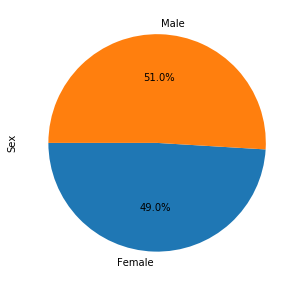

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(["Sex"])["Sex"].count()
sex.plot.pie(startangle=180,autopct='%1.1f%%',figsize=(5, 5))

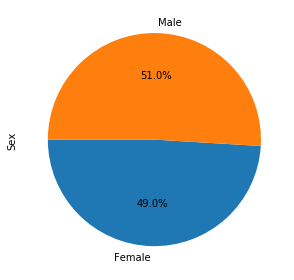

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=("Female", "Male"), startangle=180, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm_df = pd.DataFrame(clean_df.groupby(["Mouse ID"])["Timepoint"].max().sort_values())
last_tm_df
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_df = pd.merge(clean_df, last_tm_df, on=("Mouse ID"), how="right")
merged_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumour Volume (mm3),Metastatic Sites,Timepoint_y
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,45
k403,Ramicane,Male,21,16,5,38.825898,0,45
k403,Ramicane,Male,21,16,10,35.014271,1,45
k403,Ramicane,Male,21,16,15,34.223992,1,45
k403,Ramicane,Male,21,16,20,32.997729,1,45


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
treatment_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumour volumes
for drug in treatments:
    
    temp_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    
    # add subset
    final_volume_df = temp_df.loc[temp_df["Timepoint_x"] == temp_df["Timepoint_y"]]
    values = final_volume_df["Tumour Volume (mm3)"]
    treatment_values.append(values)     
    
# Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {drug}: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    outliers_count = (values.loc[(final_volume_df["Tumour Volume (mm3)"] >= upper_bound) | 
                                        (final_volume_df["Tumour Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of {drug} outliers: {outliers_count}")    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


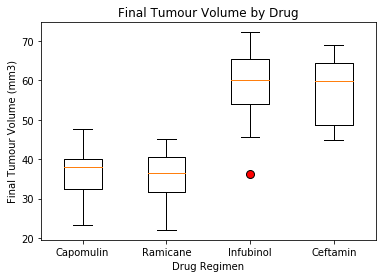

In [24]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
flierprops = dict(marker="o", markerfacecolor="r", markersize=8, markeredgecolor="black")
plt.boxplot(treatment_values, flierprops=flierprops)
plt.title("Final Tumour Volume by Drug")
plt.ylabel("Final Tumour Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

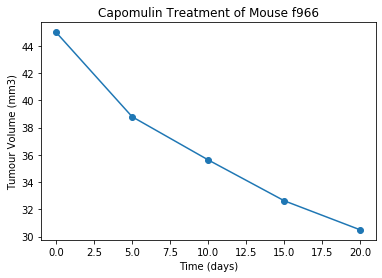

In [25]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
cleani_df = clean_df.reset_index()
mouse = cleani_df.loc[cleani_df["Mouse ID"] == "f966"]
plt.plot(mouse["Timepoint"], mouse["Tumour Volume (mm3)"], marker = "o")
plt.xlabel("Time (days)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Capomulin Treatment of Mouse f966")
plt.show()

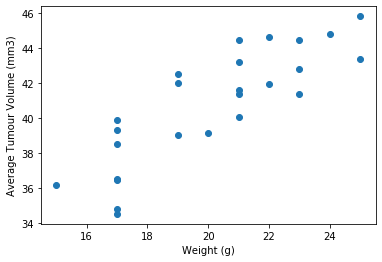

In [26]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumour Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


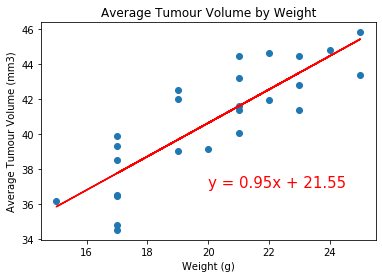

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
x = capomulin_avg["Weight (g)"]
y = capomulin_avg["Tumour Volume (mm3)"]

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title('Average Tumour Volume by Weight')
plt.show()